In [2]:
from enum import Enum
import numpy as np
import random
from typing import List

In [3]:
class PlayerStrategy(Enum):
    KEEP_DOOR = 0
    CHANGE_DOOR = 1

class DoorContent(Enum):
    GOAT = 0
    CAR = 1

class Outcome(Enum):
    WIN = 0
    LOSE = 1


class MontyHallGame:

    def __init__(self, num_doors=3, seed = 0):
        np.random.seed(seed)
        assert num_doors > 2

        self.doors: List[DoorContent] = [DoorContent.GOAT] * num_doors

        # One door hides the car
        self.doors[random.randint(0, num_doors - 1)] = DoorContent.CAR
    
    def play(self, player_strategy: PlayerStrategy) -> Outcome:
        available_doors = list(range(len(self.doors)))

        # Player chooses door
        player_chosen_door = random.choice(available_doors)
        available_doors.remove(player_chosen_door)
        
        # Monty opens a door hiding a goat
        while True:
            monty_opened_door = random.choice(available_doors)
            if self.doors[monty_opened_door] == DoorContent.GOAT:
                break
        available_doors.remove(monty_opened_door)
        
        if player_strategy == PlayerStrategy.KEEP_DOOR:
            player_final_choice = player_chosen_door
        elif player_strategy == PlayerStrategy.CHANGE_DOOR:
            player_final_choice = random.choice(available_doors)
        else:
            raise Exception("Do other strategies even exist?")
        
        if self.doors[player_final_choice] == DoorContent.CAR:
            return Outcome.WIN
        else:
            return Outcome.LOSE

In [14]:
def run_game_simulations(player_strategy: PlayerStrategy, num_doors: int, num_simulations: int) -> List[Outcome]:
    outcomes = [ MontyHallGame(num_doors=num_doors).play(player_strategy=player_strategy) for _ in range(num_simulations)]
    return outcomes

def percentage(value: int, total: float, ndigits = 3):
    return round(value / total * 100, ndigits)

def stringify_strategy(ps: PlayerStrategy):
    s = str(ps)
    return " ".join((s[15:-5], s[-4:]))

strategies = [PlayerStrategy.KEEP_DOOR, PlayerStrategy.CHANGE_DOOR]


In [15]:
# params
num_simulations = 10000
num_doors = 3

# run simulation

for strategy in strategies:
    outcomes = run_game_simulations(player_strategy=strategy, num_doors=num_doors, num_simulations=num_simulations)

    wins_percentage = percentage(outcomes.count(Outcome.WIN), total=num_simulations)
    defeats_percentage = percentage(outcomes.count(Outcome.LOSE), total=num_simulations)
    strategy_str = stringify_strategy(strategy)

    print("=========")
    print(strategy_str)
    print("Win:    \t{}%".format(wins_percentage))
    print("Defeats:\t{}%".format(defeats_percentage))
    print("=========")

KEEP DOOR
Win:    	33.37%
Defeats:	66.63%
CHANGE DOOR
Win:    	67.32%
Defeats:	32.68%


### 3 doors

In [20]:
strategy_wins_dict = {}
num_simulations = 1_000_000

outcomes = run_game_simulations(player_strategy=PlayerStrategy.KEEP_DOOR, num_doors=3, num_simulations=num_simulations)

strategy_wins_dict[stringify_strategy(PlayerStrategy.KEEP_DOOR)] = percentage(outcomes.count(Outcome.WIN), total=num_simulations, ndigits=2)

# losing = winning with 3 doors
strategy_wins_dict[stringify_strategy(PlayerStrategy.CHANGE_DOOR)] = percentage(outcomes.count(Outcome.LOSE), total=num_simulations, ndigits=2)

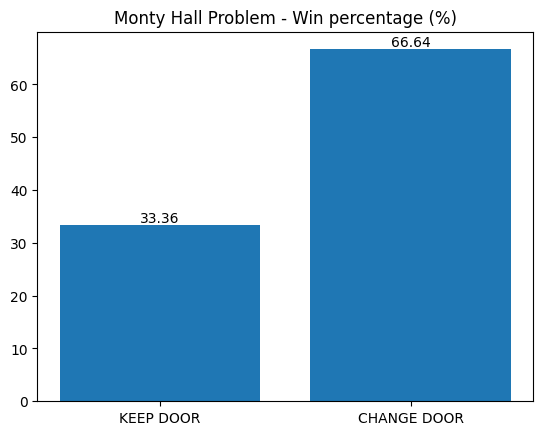

In [21]:
import matplotlib.pyplot as plt

plt.title("Monty Hall Problem - Win percentage (%)")
ax = plt.bar(*zip(*strategy_wins_dict.items()))
plt.bar_label(ax)
plt.savefig("images/result.png")